# Exploratory Data Analysis (EDA)

Objective:
- Understand data structure
- Detect missing values
- Analyze churn distribution
- Identify important patterns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

# Missing Value

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
(df=="").sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
null_ratio =df.isnull().mean() * 100
null_ratio = null_ratio[null_ratio > 0]
df = df.dropna()


# Target Analysis


In [ ]:
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [ ]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

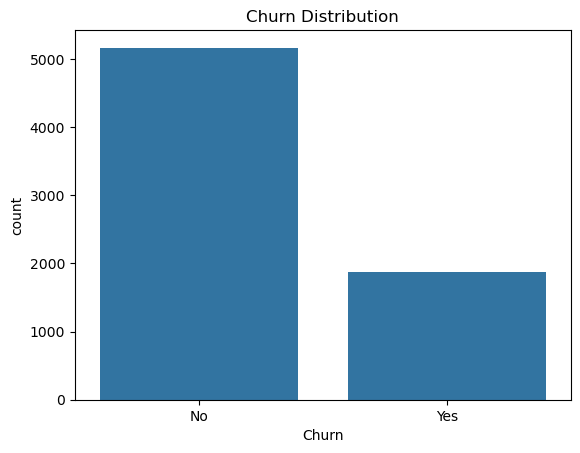

In [ ]:
sns.countplot(x="Churn",data=df)
plt.title("Churn Distribution")
plt.show()

Dataset is moderately imbalanced (%26 churn rate)

In [ ]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

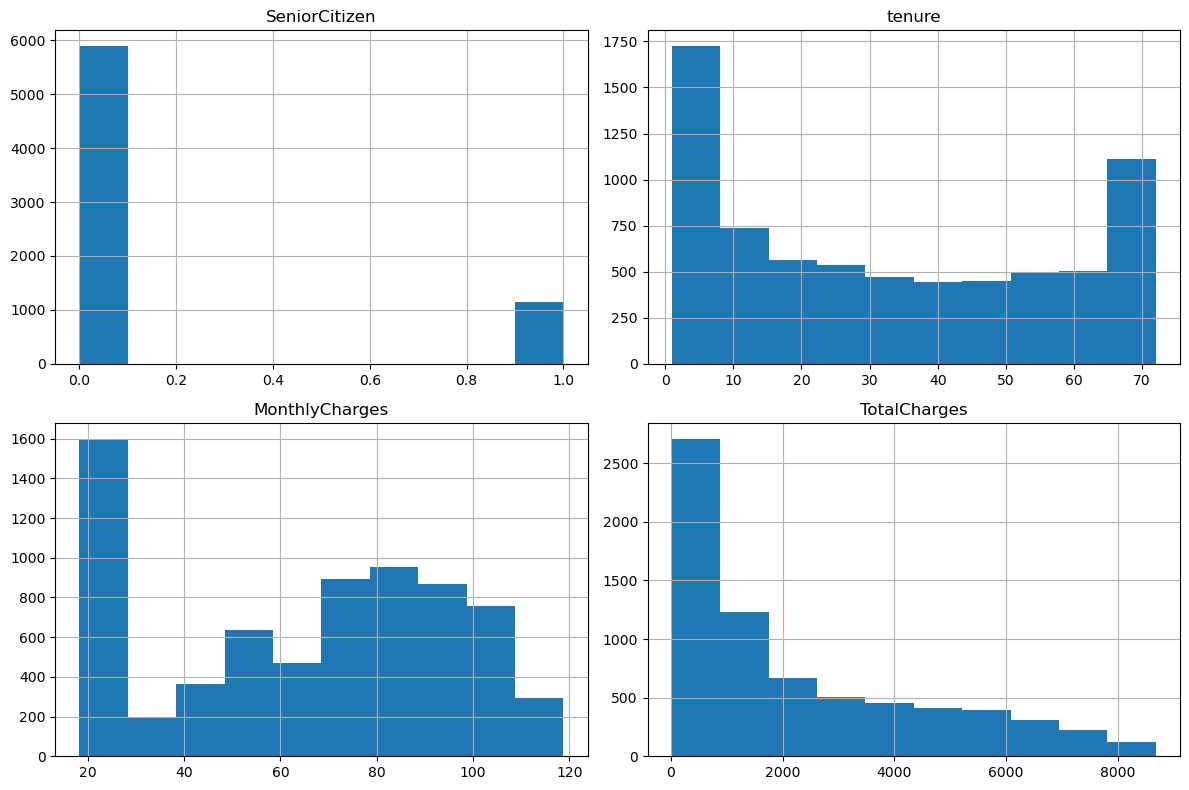

In [ ]:
df[num_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# Churn vs Numerical

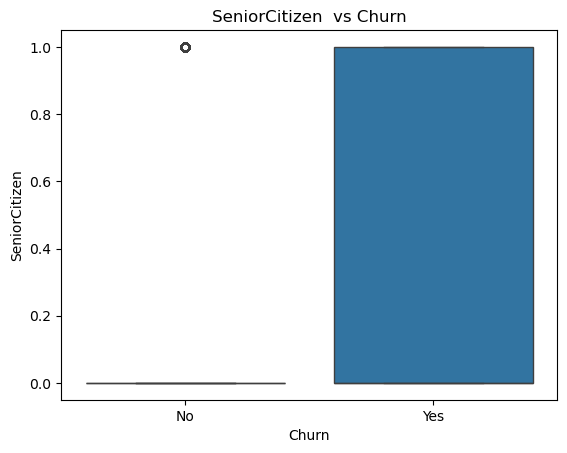

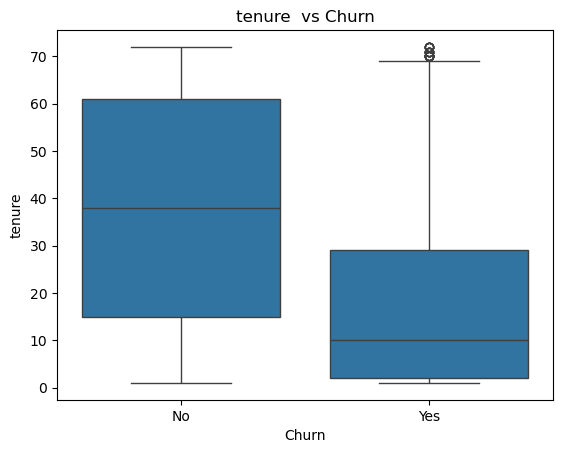

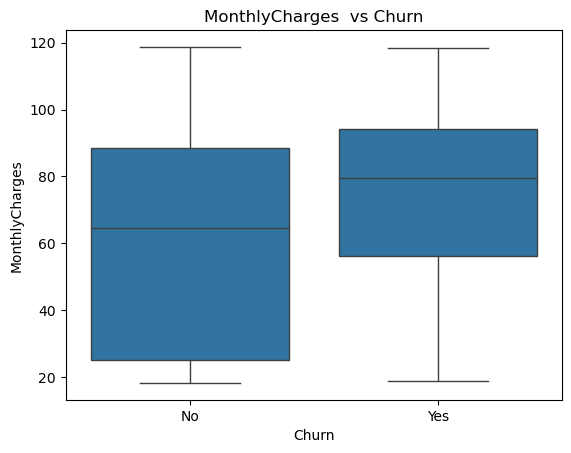

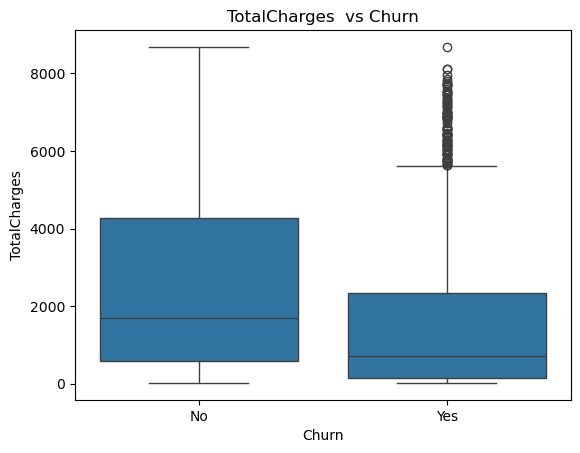

In [ ]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x="Churn",y=col,data=df)
    plt.title(f"{col}  vs Churn")

# Categorical Feature Analysis

In [ ]:
cat_cols = df.select_dtypes(include=["object"]).columns
cat_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
for col in cat_cols:
    if col != "customerID":
        print("\n", col)
        print(pd.crosstab(df[col], df["Churn"], normalize="index"))


 gender
Churn         No       Yes
gender                    
Female  0.730405  0.269595
Male    0.737954  0.262046

 Partner
Churn          No       Yes
Partner                    
No       0.670239  0.329761
Yes      0.802829  0.197171

 Dependents
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.844688  0.155312

 PhoneService
Churn               No       Yes
PhoneService                    
No            0.750000  0.250000
Yes           0.732525  0.267475

 MultipleLines
Churn                   No       Yes
MultipleLines                       
No                0.749188  0.250812
No phone service  0.750000  0.250000
Yes               0.713515  0.286485

 InternetService
Churn                  No       Yes
InternetService                    
DSL              0.810017  0.189983
Fiber optic      0.581072  0.418928
No               0.925658  0.074342

 OnlineSecurity
Churn                      No       Yes
OnlineSecurity       

# Correlation Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

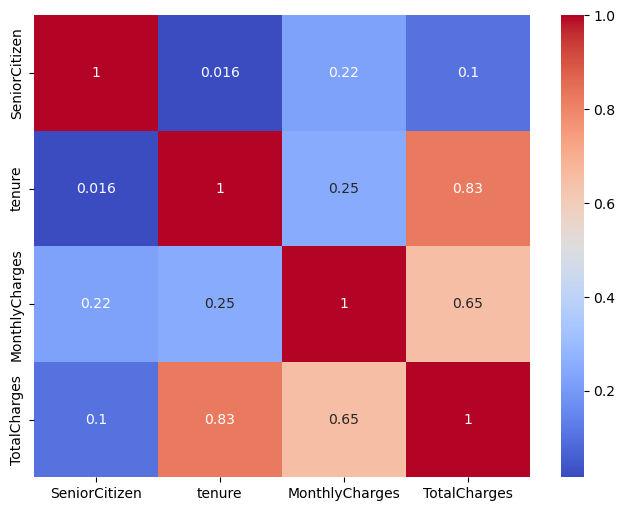

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(),annot =True ,cmap="coolwarm")
plt.show


# Outlier (Simple IQR)

In [ ]:
Q1 =df["MonthlyCharges"].quantile(0.25)
Q3 = df["MonthlyCharges"].quantile(0.75)

IQR = Q3-Q1

lower = Q1 -1.5*IQR
upper = Q3 + 1.5 *IQR

df[(df["MonthlyCharges"]<lower) | (df["MonthlyCharges"]> upper)].shape

(0, 21)

## Key Findings

1. Month-to-month contracts show the highest churn rate (~42.7%).
2. Customers using electronic check have the highest churn (~45%).
3. Fiber optic customers churn more than DSL users.
4. Lack of tech support strongly increases churn probability.
5. Customers without partners or dependents are more likely to churn.
6. Gender does not significantly impact churn.